In [1]:
%matplotlib inline
import matplotlib.pylab as pylab

from numpy import *
from pylab import *

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
###############################################################################
def tukeywin(window_length, alpha=0.5):
    '''The Tukey window, also known as the tapered cosine window, 
       can be regarded as a cosine lobe of width \alpha * N / 2
       that is convolved with a rectangle window of width (1 - \alpha / 2).
       At \alpha = 1 it becomes rectangular, and at \alpha = 0 it becomes a Hann window.
    '''
    # Special cases
    if alpha <= 0:
        return ones(window_length) #rectangular window
    elif alpha >= 1:
        return hanning(window_length)
 
    # Normal case
    x = linspace(0, 1, window_length)
    w = ones(x.shape)
 
    # first condition 0 <= x < alpha/2
    first_condition = x<alpha/2
    w[first_condition] = 0.5 * (1 + cos(2*pi/alpha * (x[first_condition] - alpha/2) ))
 
    # second condition already taken care of
 
    # third condition 1 - alpha / 2 <= x <= 1
    third_condition = x>=(1 - alpha/2)
    w[third_condition] = 0.5 * (1 + cos(2*pi/alpha * (x[third_condition] - 1 + alpha/2)))
 
    return w

2.80953226667e-06


/home/sbrown/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


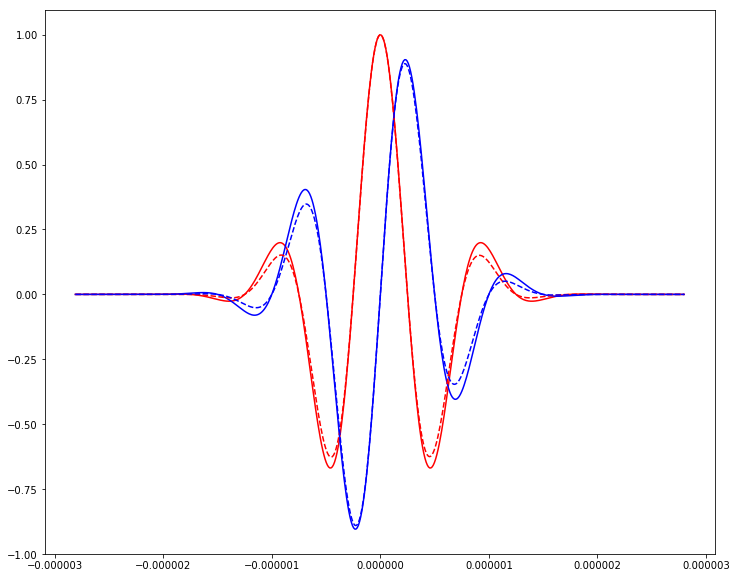

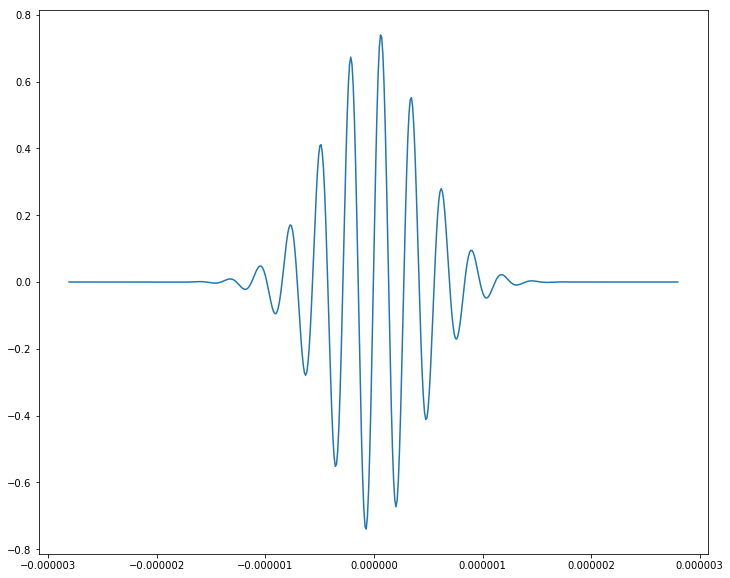

In [37]:
pylab.rcParams['figure.figsize'] = (12.0, 10.0)

fc = 1e6
bw = 0.7
# bw = 0.3

tc = signal.gausspulse('cutoff',fc=1e6,bw=0.1,bwr=-100,tpr=-6)
tc = signal.gausspulse('cutoff',fc=fc,bw=bw,tpr=-120)
print (tc)
t = np.linspace(-tc, tc, 2 * 512/2+1, endpoint=False)
i, q, e = signal.gausspulse(t, fc=fc, bw=bw, retquad=True, retenv=True)
w = tukeywin(len(i),1.0)

plt.plot(t,i,'r')
plt.plot(t,q,'b')
plt.plot(t,w*i,'r--')
plt.plot(t,w*q,'b--')
#x=np.loadtxt('GaussPulse.txt')
#plt.plot(t,x[0:len(t)],'g')


plt.show()

m = signal.morlet(513,10)
plt.plot(t,np.imag(m))

In [38]:
q = w*q
i = w*i

q = np.imag(m)
i = np.real(m)

np.savetxt('MoreletQ.txt',q, fmt='%1.4f')
np.savetxt('MoreletI.txt',i, fmt='%1.4f')

iz = np.zeros(4096)
qz = np.zeros(4096)

iz[0:513] = i
qz[0:513] = q

np.savetxt('GaussPlsQz.txt',qz, fmt='%1.4f')
np.savetxt('GaussPlsIz.txt',iz, fmt='%1.4f')


print (i.std(), q.std())
print ((i.max()-i.min())/2.0)
print ((q.max()-q.min())/2.0)
# print (len(t), len(x))
# print (t[1]-t[0])

0.199276629047 0.199276629047
0.73205704037
0.739447164627


In [5]:
1.0e-6/1.09533421703e-08

91.29633535155152

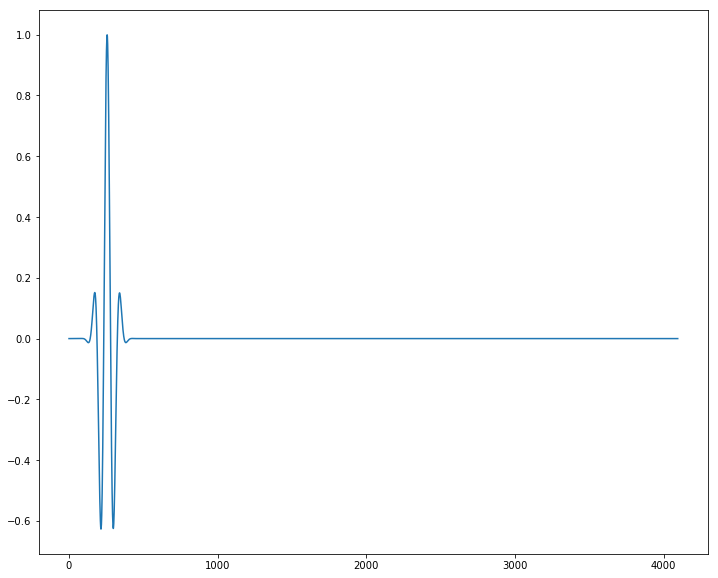

In [6]:
plot(iz)